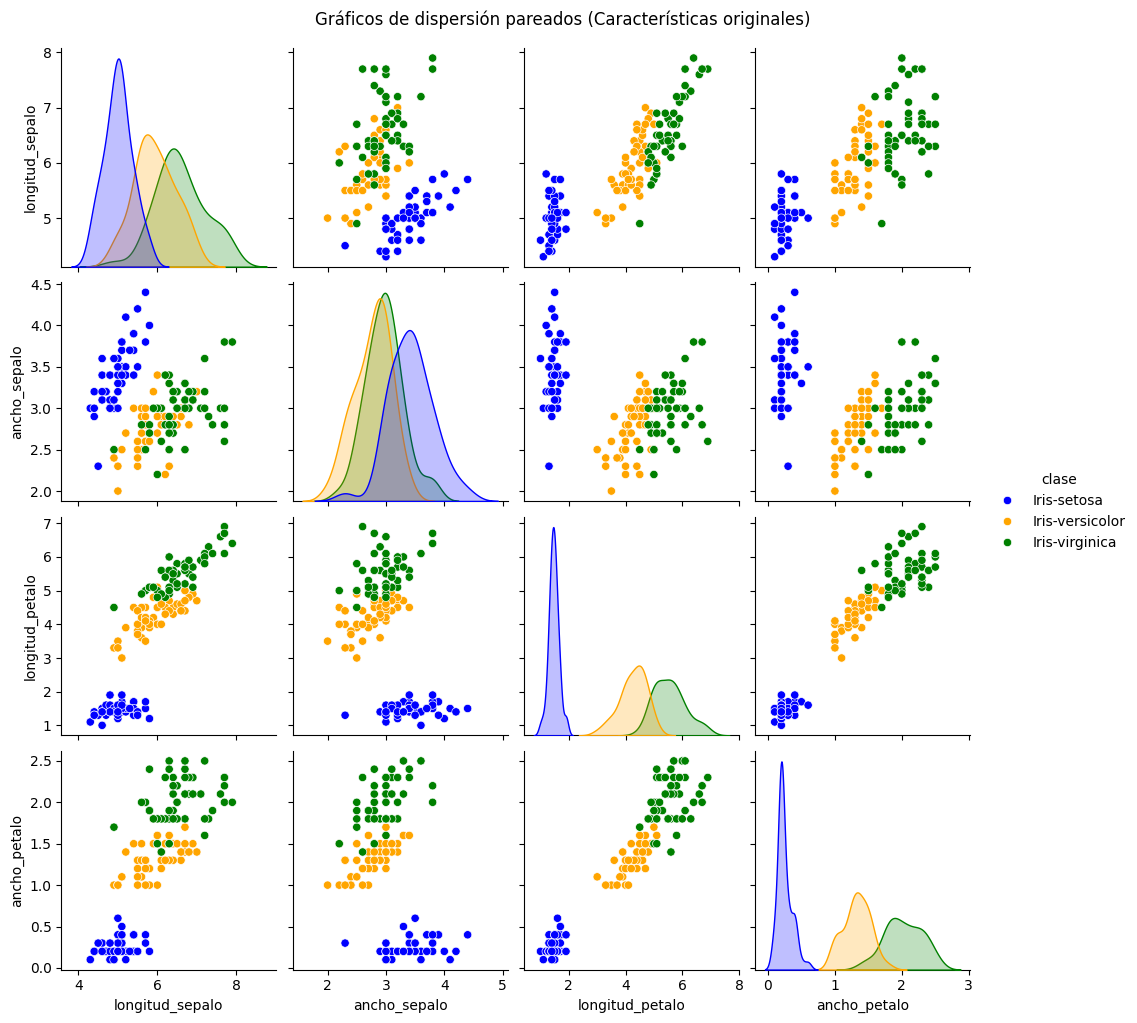

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Cargar el dataset
df = pd.read_csv('data/iris.data', header=0, names=['longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo', 'clase'])

# Corregir los valores de la columna 'clase' si es necesario
df['clase'] = df['clase'].str.strip()  # Eliminar espacios extra si existen
df['clase'] = df['clase'].replace({
    'Setosa': 'Iris-setosa',
    'Versicolor': 'Iris-versicolor',
    'Virginica': 'Iris-virginica'
})

# Mostrar scatter plots pareados de las características originales
sns.pairplot(df, vars=['longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo'], hue='clase',
             palette={'Iris-setosa': 'b', 'Iris-versicolor': 'orange', 'Iris-virginica': 'g'})
plt.suptitle("Gráficos de dispersión pareados (Características originales)", y=1.02)
plt.show()




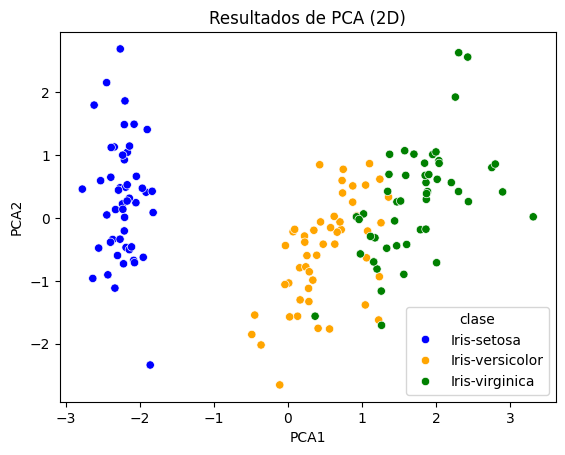

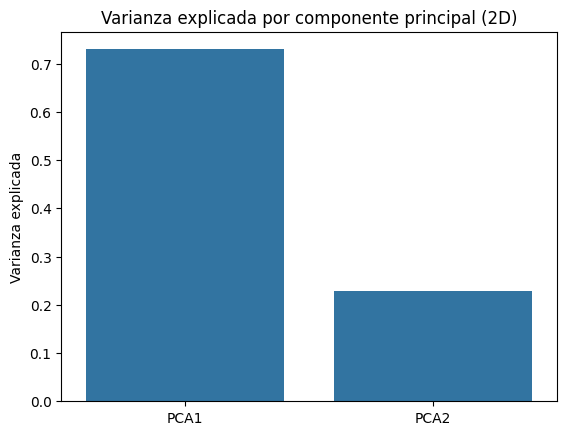

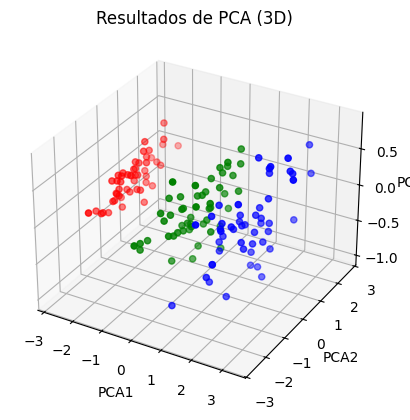

In [6]:
# Selección de columnas para PCA
X_cols = ['longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo']

# Escalar los datos
ss = StandardScaler()
df[X_cols] = ss.fit_transform(df[X_cols])

# PCA para 2 componentes
pca2 = PCA(n_components=2, random_state=42)
pca_2 = pca2.fit_transform(df[X_cols])

# Crear un DataFrame con los resultados de PCA 2D
df_2 = pd.DataFrame({
    'PCA1': pca_2[:, 0],
    'PCA2': pca_2[:, 1],
    'clase': df['clase']
})

# Graficar los resultados de PCA 2D
palette = {'Iris-setosa': 'b', 'Iris-versicolor': 'orange', 'Iris-virginica': 'g'}
sns.scatterplot(data=df_2, x='PCA1', y='PCA2', hue='clase', palette=palette)
plt.title("Resultados de PCA (2D)")
plt.show()

# Graficar varianza explicada para PCA 2D
sns.barplot(x=['PCA1', 'PCA2'], y=pca2.explained_variance_ratio_)
plt.ylabel('Varianza explicada')
plt.title("Varianza explicada por componente principal (2D)")
plt.show()

# PCA para 3 componentes
pca3 = PCA(n_components=3, random_state=42)
pca_3 = pca3.fit_transform(df[X_cols])

# Crear un DataFrame con los resultados de PCA 3D
df_3 = pd.DataFrame({
    'PCA1': pca_3[:, 0],
    'PCA2': pca_3[:, 1],
    'PCA3': pca_3[:, 2],
    'clase': df['clase']
})

# Graficar los resultados de PCA 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df_3['PCA1']
y = df_3['PCA2']
z = df_3['PCA3']
col = df_3['clase'].map({'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'})

ax.scatter(x, y, z, c=col, marker='o')

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title("Resultados de PCA (3D)")
plt.show()